In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (16, 10)

random_state= 11

# Import and Cleaning

In [2]:
df = pd.read_csv('data/treasury_rates.csv')
df_mort =pd.read_csv('data/mort_30.csv')

In [3]:
df

DATE DGS6MO  DGS1  DGS2  DGS5 DGS10 DGS30
0     1986-02-18   7.42  7.56  7.96  8.28  8.64  8.89
1     1986-02-19   7.51  7.67  8.06  8.37   8.7  8.92
2     1986-02-20   7.54  7.68  8.05  8.39  8.67  8.88
3     1986-02-21   7.42  7.56  7.93  8.24  8.48  8.73
4     1986-02-24   7.41  7.53  7.86   8.2  8.39  8.61
...          ...    ...   ...   ...   ...   ...   ...
9188  2021-05-07   0.04  0.05  0.14  0.77   1.6  2.28
9189  2021-05-10   0.04  0.05  0.16   0.8  1.63  2.32
9190  2021-05-11   0.04  0.05  0.16   0.8  1.64  2.35
9191  2021-05-12   0.04  0.05  0.16  0.87  1.69   2.4
9192  2021-05-13   0.03  0.05  0.16  0.84  1.66  2.39

[9193 rows x 7 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    9193 non-null   object
 1   DGS6MO  9193 non-null   object
 2   DGS1    9193 non-null   object
 3   DGS2    9193 non-null   object
 4   DGS5    9193 non-null   object
 5   DGS10   9193 non-null   object
 6   DGS30   9193 non-null   object
dtypes: object(7)
memory usage: 502.9+ KB


In [5]:
df[df['DGS1'] == '.']

DATE DGS6MO DGS1 DGS2 DGS5 DGS10 DGS30
28    1986-03-28      .    .    .    .     .     .
69    1986-05-26      .    .    .    .     .     .
98    1986-07-04      .    .    .    .     .     .
139   1986-09-01      .    .    .    .     .     .
169   1986-10-13      .    .    .    .     .     .
...          ...    ...  ...  ...  ...   ...   ...
9072  2020-11-26      .    .    .    .     .     .
9093  2020-12-25      .    .    .    .     .     .
9098  2021-01-01      .    .    .    .     .     .
9109  2021-01-18      .    .    .    .     .     .
9129  2021-02-15      .    .    .    .     .     .

[376 rows x 7 columns]

* Date needs to be set to datetime
* Other values should be floats.  I suspect this is because the null values are '.'

In [6]:
df_mort[df_mort['MORTGAGE30US']== '.']

Empty DataFrame
Columns: [DATE, MORTGAGE30US]
Index: []

In [7]:
df_mort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          1736 non-null   object 
 1   MORTGAGE30US  1736 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.2+ KB


* Just need to change the Date to datetime

In [8]:
df['DATE'] = pd.to_datetime(df['DATE'])
df_mort['DATE'] = pd.to_datetime(df_mort['DATE'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    9193 non-null   datetime64[ns]
 1   DGS6MO  9193 non-null   object        
 2   DGS1    9193 non-null   object        
 3   DGS2    9193 non-null   object        
 4   DGS5    9193 non-null   object        
 5   DGS10   9193 non-null   object        
 6   DGS30   9193 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 502.9+ KB


In [10]:
df.head(20)

DATE DGS6MO  DGS1  DGS2  DGS5 DGS10 DGS30
0  1986-02-18   7.42  7.56  7.96  8.28  8.64  8.89
1  1986-02-19   7.51  7.67  8.06  8.37   8.7  8.92
2  1986-02-20   7.54  7.68  8.05  8.39  8.67  8.88
3  1986-02-21   7.42  7.56  7.93  8.24  8.48  8.73
4  1986-02-24   7.41  7.53  7.86   8.2  8.39  8.61
5  1986-02-25   7.43  7.59  7.89  8.21   8.4   8.6
6  1986-02-26   7.42  7.57  7.88  8.07  8.36  8.54
7  1986-02-27   7.36  7.48  7.72  7.91  8.15  8.32
8  1986-02-28   7.36  7.43  7.71  7.91  8.13  8.27
9  1986-03-03    7.3  7.35  7.55  7.76  7.99  8.16
10 1986-03-04   7.11  7.23  7.38  7.55  7.93   8.1
11 1986-03-05   7.16   7.3  7.54  7.76  8.12  8.26
12 1986-03-06   7.02  7.14  7.38  7.68  8.04  8.19
13 1986-03-07   6.93  7.07  7.29  7.56  7.96  8.15
14 1986-03-10   6.87  7.01  7.16  7.41  7.76     8
15 1986-03-11   6.88  7.03  7.15  7.35   7.7  7.94
16 1986-03-12   6.91  7.04  7.17  7.37  7.68  7.91
17 1986-03-13   6.96  7.07  7.21  7.46  7.75  7.95
18 1986-03-14   6.88     7  7.18   7.4  7.72  7.95
19 1986-03-17   6.92  7.03  7.22  7.42  7.77  7.97

* The missing data here is from Christmas and New Years, which makes sense since the market is closed.
* I'll fill in the missing data from the value of the previous day.

In [11]:
# Forward Fill the missing values
df = df.replace('.', np.nan).ffill(axis=0)

In [12]:
df

DATE DGS6MO  DGS1  DGS2  DGS5 DGS10 DGS30
0    1986-02-18   7.42  7.56  7.96  8.28  8.64  8.89
1    1986-02-19   7.51  7.67  8.06  8.37   8.7  8.92
2    1986-02-20   7.54  7.68  8.05  8.39  8.67  8.88
3    1986-02-21   7.42  7.56  7.93  8.24  8.48  8.73
4    1986-02-24   7.41  7.53  7.86   8.2  8.39  8.61
...         ...    ...   ...   ...   ...   ...   ...
9188 2021-05-07   0.04  0.05  0.14  0.77   1.6  2.28
9189 2021-05-10   0.04  0.05  0.16   0.8  1.63  2.32
9190 2021-05-11   0.04  0.05  0.16   0.8  1.64  2.35
9191 2021-05-12   0.04  0.05  0.16  0.87  1.69   2.4
9192 2021-05-13   0.03  0.05  0.16  0.84  1.66  2.39

[9193 rows x 7 columns]

* Looks good.

In [13]:
df = df.rename(columns={'DATE': 'date',
                        'DGS6MO': 'mo_6',
                        'DGS1': 'yr_1',
                        'DGS2': 'yr_2',
                        'DGS5': 'yr_5',
                        'DGS10': 'yr_10',
                        'DGS30': 'yr_30'})

df_mort = df_mort.rename(columns={'DATE': 'date',
                                  'MORTGAGE30US': 'mort_30'})

In [14]:
df.set_index('date', inplace=True)
df_mort.set_index('date', inplace=True)

In [15]:
df = df['1989':]
df_mort = df_mort['1989':]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8444 entries, 1989-01-02 to 2021-05-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mo_6    8444 non-null   object
 1   yr_1    8444 non-null   object
 2   yr_2    8444 non-null   object
 3   yr_5    8444 non-null   object
 4   yr_10   8444 non-null   object
 5   yr_30   8444 non-null   object
dtypes: object(6)
memory usage: 461.8+ KB


* Need to make these columns into floats

In [17]:
df =df.iloc[:,0:] = df.iloc[:,0:].astype('float')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8444 entries, 1989-01-02 to 2021-05-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mo_6    8444 non-null   float64
 1   yr_1    8444 non-null   float64
 2   yr_2    8444 non-null   float64
 3   yr_5    8444 non-null   float64
 4   yr_10   8444 non-null   float64
 5   yr_30   8444 non-null   float64
dtypes: float64(6)
memory usage: 461.8 KB


* Looks good

In [19]:
df_mort.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1690 entries, 1989-01-06 to 2021-05-20
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mort_30  1690 non-null   float64
dtypes: float64(1)
memory usage: 26.4 KB


* Looks good

In [20]:
df.describe()

mo_6         yr_1         yr_2         yr_5        yr_10  \
count  8444.000000  8444.000000  8444.000000  8444.000000  8444.000000   
mean      2.970870     3.091595     3.377055     3.959298     4.485083   
std       2.497012     2.495160     2.504342     2.322941     2.111447   
min       0.020000     0.050000     0.090000     0.190000     0.520000   
25%       0.380000     0.520000     0.910000     1.790000     2.610000   
50%       2.490000     2.600000     3.025000     3.850000     4.370000   
75%       5.162500     5.260000     5.520000     5.850000     6.060000   
max       9.690000     9.850000     9.920000     9.750000     9.530000   

             yr_30  
count  8444.000000  
mean      5.017933  
std       1.902097  
min       0.990000  
25%       3.200000  
50%       4.930000  
75%       6.360000  
max       9.310000

Text(0.5, 0, 'Date')

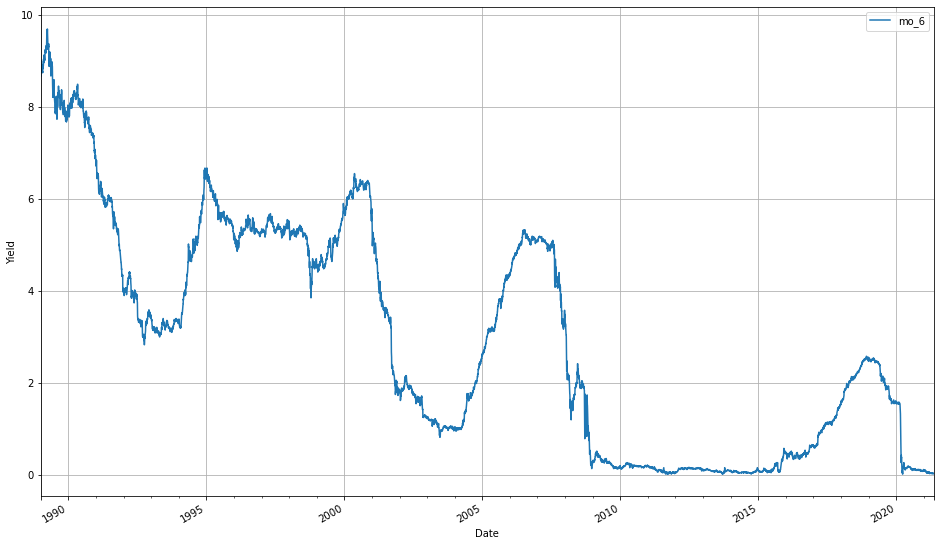

In [21]:
df[['mo_6']].plot(subplots=True, grid=True)
plt.ylabel('Yield')
plt.xlabel('Date')

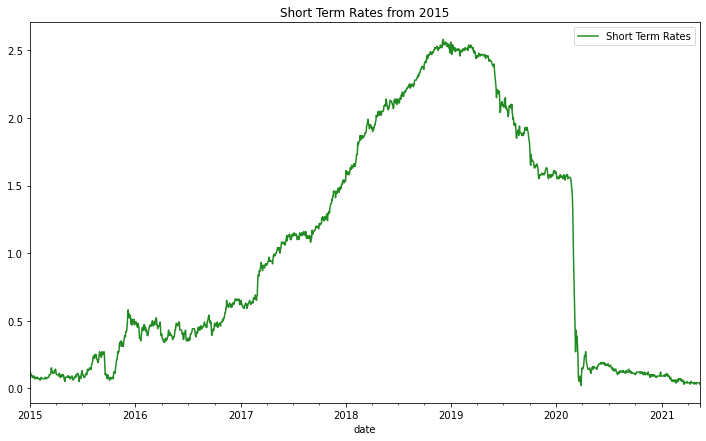

In [22]:
plt.figure(figsize=(12,7))
df['mo_6']['2015':].plot(color='forestgreen', label='Short Term Rates')
plt.title('Short Term Rates from 2015')
plt.legend()

Text(0.5, 0, 'Date')

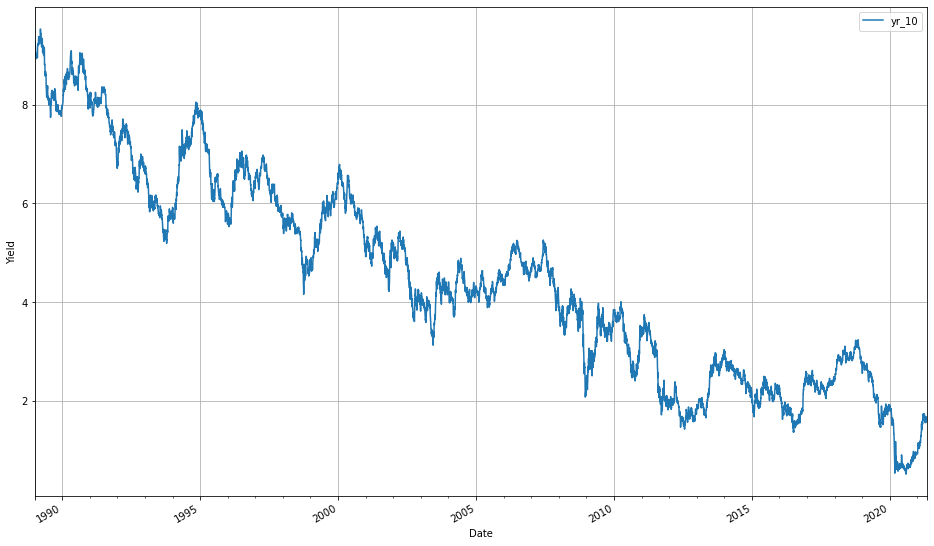

In [23]:
df[['yr_10']].plot(subplots=True, grid=True)
plt.ylabel('Yield')
plt.xlabel('Date')

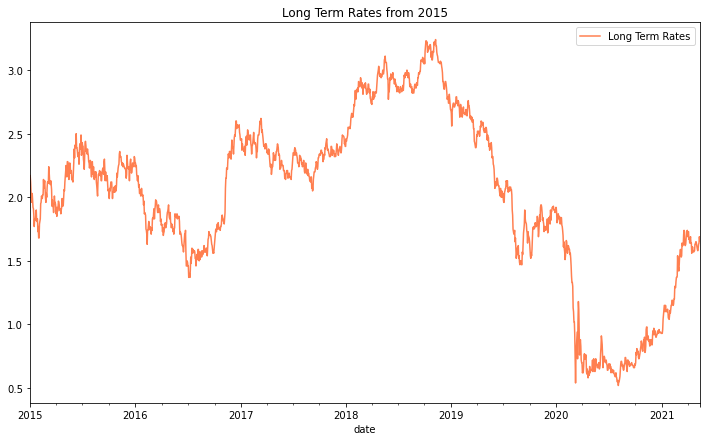

In [24]:
plt.figure(figsize=(12,7))
df['yr_10']['2015':].plot(color='coral', label='Long Term Rates')
plt.title('Long Term Rates from 2015')
plt.legend()

(array([1630., 2217., 2304., 1521.,  772.]),
 array([0.52 , 2.322, 4.124, 5.926, 7.728, 9.53 ]),
 <BarContainer object of 5 artists>)

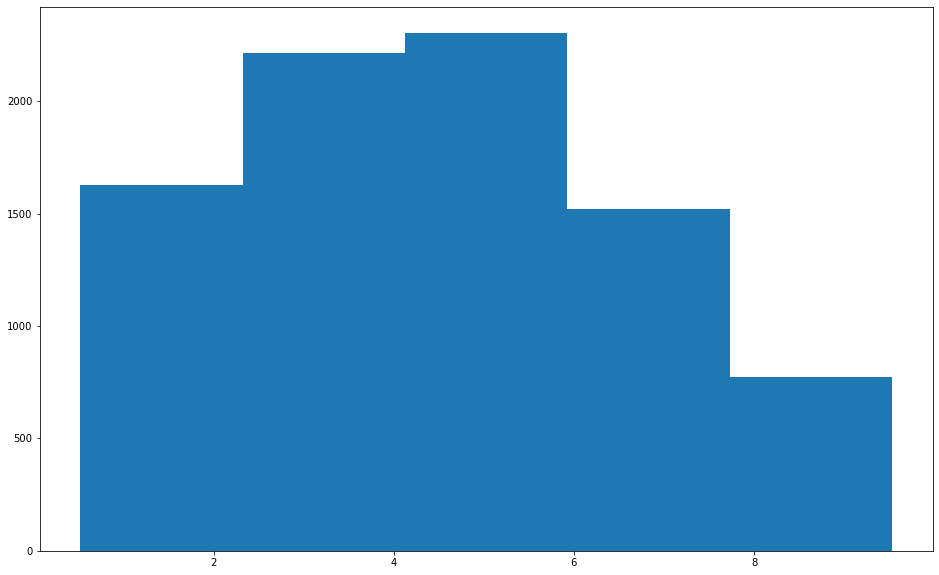

In [25]:
plt.hist(df['yr_10'], bins=5)

In [40]:
ys_month = df['yr_10'].resample('MS').mean()
ys_std = df['yr_10'].resample('MS').std()
mort_30 = df_mort['mort_30'].resample('MS').mean()

In [52]:
m_extra =pd.DataFrame(mort_30).join(ys_month, on=mort_30.index)

<AxesSubplot:xlabel='date'>

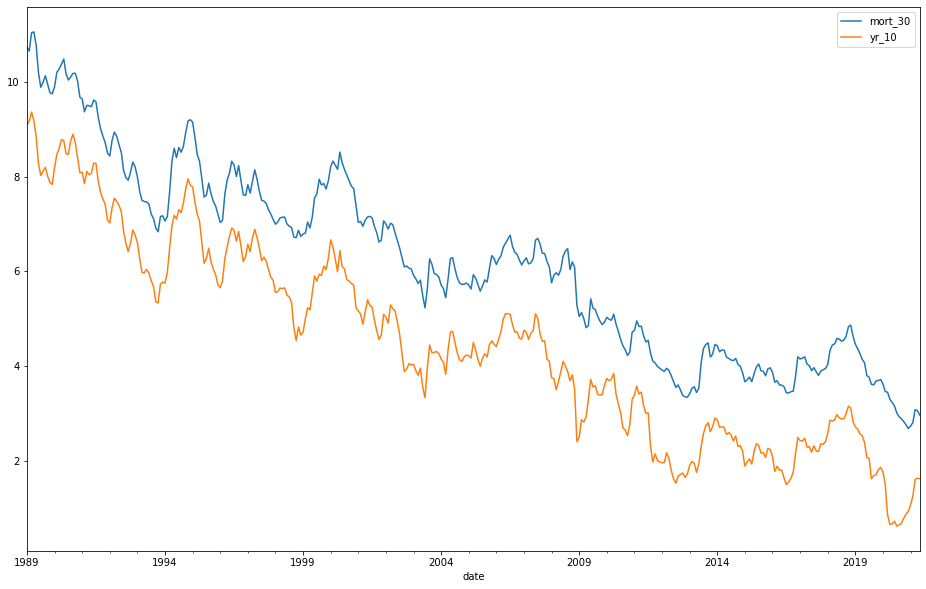

In [55]:
m_extra.plot()

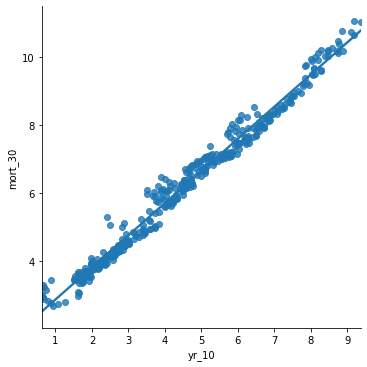

In [58]:
sns.lmplot(data=m_extra, x='yr_10', y='mort_30')

In [57]:
m_extra.corr()

mort_30     yr_10
mort_30  1.000000  0.991118
yr_10    0.991118  1.000000

* Correlation of 0.99 is obviously very high
* Shows that these bonds yields are a great predictor for mortgage interest rates.

In [26]:
roll_mean = df['yr_10'].rolling(window=90, center=False).mean()
roll_std= df['yr_10'].rolling(window=90, center=False).std()

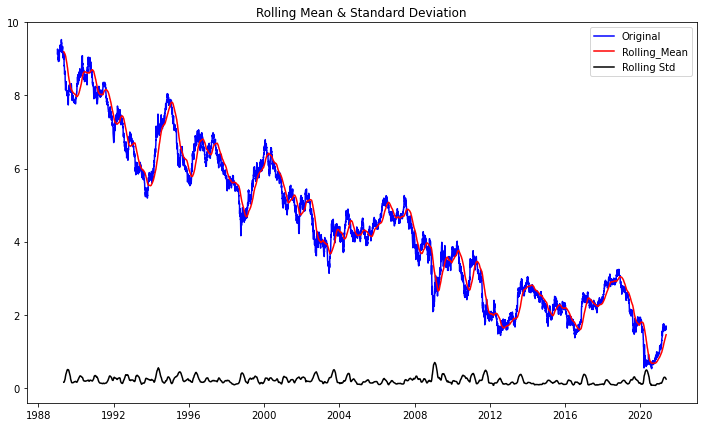

In [27]:
fig = plt.figure(figsize=(12,7))
plt.plot(df['yr_10'], color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling_Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

* The standard deviation doesn't seem to be too off.
* It's really hard to make a judgement based on this.

In [28]:
minus_rm = (df['yr_10'] - roll_mean).dropna()

In [29]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['yr_10'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                   -1.843206
p-value                           0.359232
#Lags Used                       22.000000
Number of Observations Used    8421.000000
Critical Value (1%)              -3.431127
Critical Value (5%)              -2.861883
Critical Value (10%)             -2.566953
dtype: float64


* p-value is above 0.05, so we are not stationary

* Let's subract the rolling mean from the values

In [30]:
minus_rm = (df['yr_10'] - roll_mean).dropna().resample('MS').mean()

In [31]:
ys_md = np.diff(ys_month)
ys_std = np.diff(ys_std)
ys_orig = np.array(ys_month)

In [32]:
rm_monthly =roll_mean.resample('MS').mean()

In [34]:
dftest = adfuller(ys_md)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -9.583504e+00
p-value                        2.127319e-16
#Lags Used                     4.000000e+00
Number of Observations Used    3.830000e+02
Critical Value (1%)           -3.447540e+00
Critical Value (5%)           -2.869116e+00
Critical Value (10%)          -2.570806e+00
dtype: float64


* We are definitely stationary now.  Let's plot this.

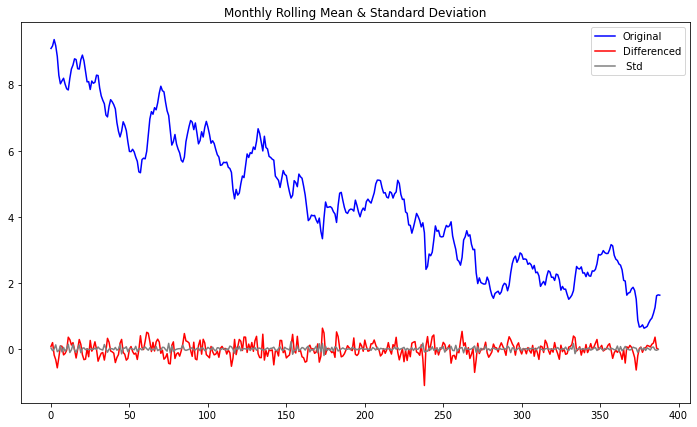

In [35]:
fig = plt.figure(figsize=(12,7))
plt.plot(ys_orig, color='blue', label='Original')
plt.plot(ys_md, color='red', label='Differenced')
plt.plot(ys_std, color='grey', label = ' Std')
plt.legend(loc='best')
plt.title('Monthly Rolling Mean & Standard Deviation')
plt.show(block=False)

### EWR

In [36]:
exp_roll_mean = df['yr_10'].ewm(halflife=45).mean()

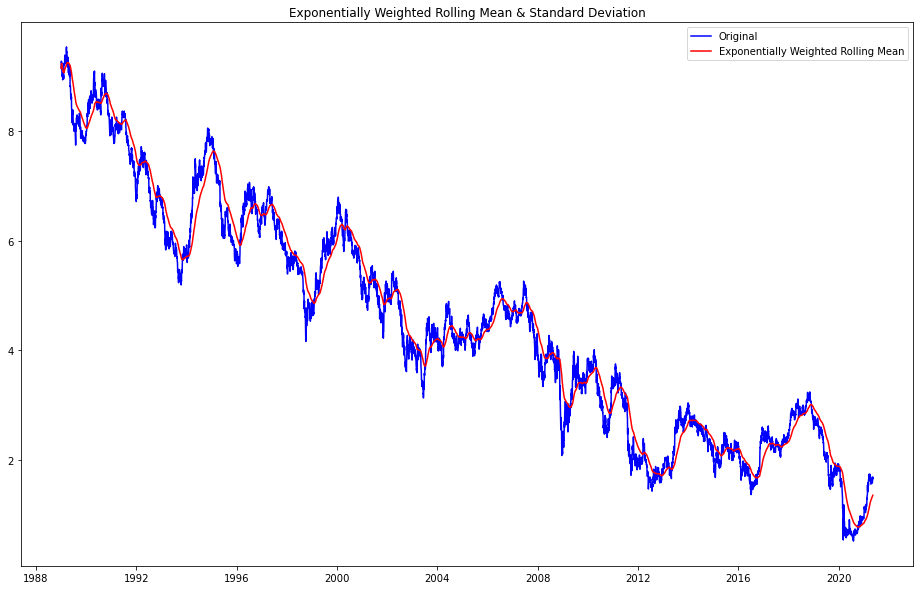

In [37]:

orig = plt.plot(df['yr_10'], color='blue',label='Original')
mean = plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

In [38]:
minus_erm =(df['yr_10'] - exp_roll_mean).dropna()
minus_erm

date
1989-01-02    0.000000
1989-01-03    0.044653
1989-01-04    0.022924
1989-01-05    0.054270
1989-01-06    0.027203
                ...   
2021-05-07    0.263626
2021-05-10    0.289138
2021-05-11    0.294566
2021-05-12    0.339299
2021-05-13    0.304571
Name: yr_10, Length: 8444, dtype: float64

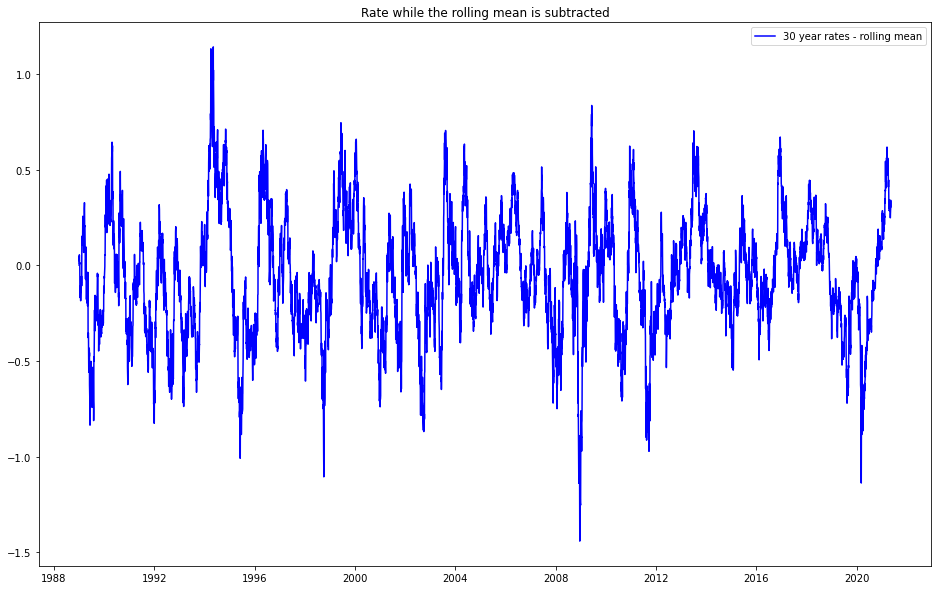

In [39]:
plt.plot(minus_erm, color='blue',label='30 year rates - rolling mean')
plt.legend(loc='best')
plt.title('Rate while the rolling mean is subtracted')
plt.show(block=False)

In [40]:
dts =minus_rm.groupby(pd.Grouper(freq='M'))

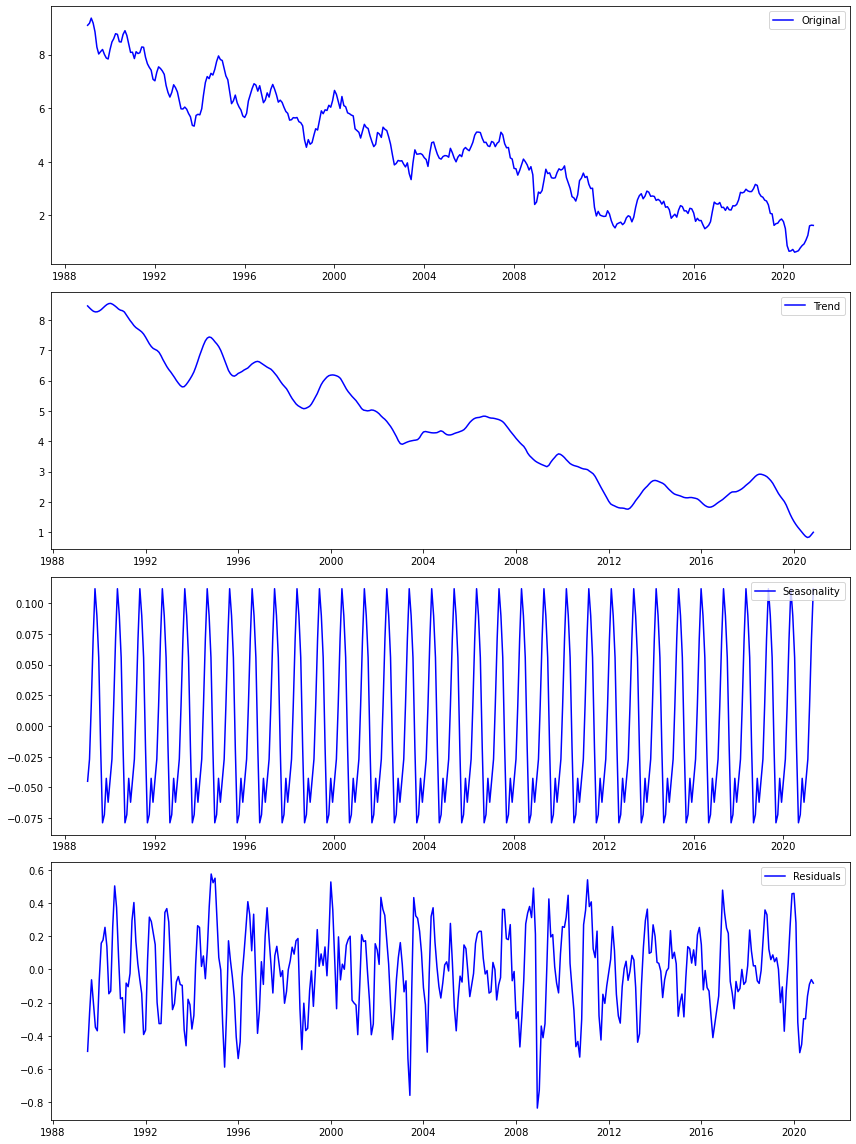

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(ys_month)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,16))
plt.subplot(411)
plt.plot(ys_month, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [42]:
ys_month

date
1989-01-01    9.092273
1989-02-01    9.170500
1989-03-01    9.360870
1989-04-01    9.175500
1989-05-01    8.850435
                ...   
2021-01-01    1.075238
2021-02-01    1.255000
2021-03-01    1.610870
2021-04-01    1.635000
2021-05-01    1.625556
Freq: MS, Name: yr_10, Length: 389, dtype: float64

Text(0, 0.5, 'Rate minus Average')

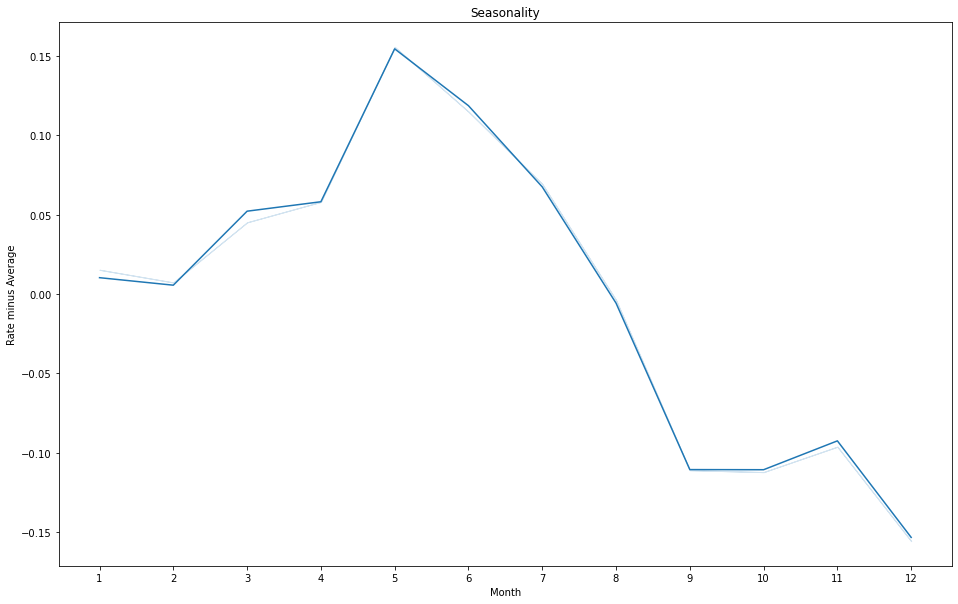

In [50]:
sns.lineplot(x=df.index.month, y=(df['yr_10']-df['yr_10'].mean()), ci=False).set_xticks(range(1, 13, 1))
plt.title('Seasonality')
plt.xlabel('Month')
plt.ylabel('Rate minus Average')


In [45]:
per_ch =(ys_month.shift(-1)-ys_month)/ys_month*100

Text(0, 0.5, 'Rate Change')

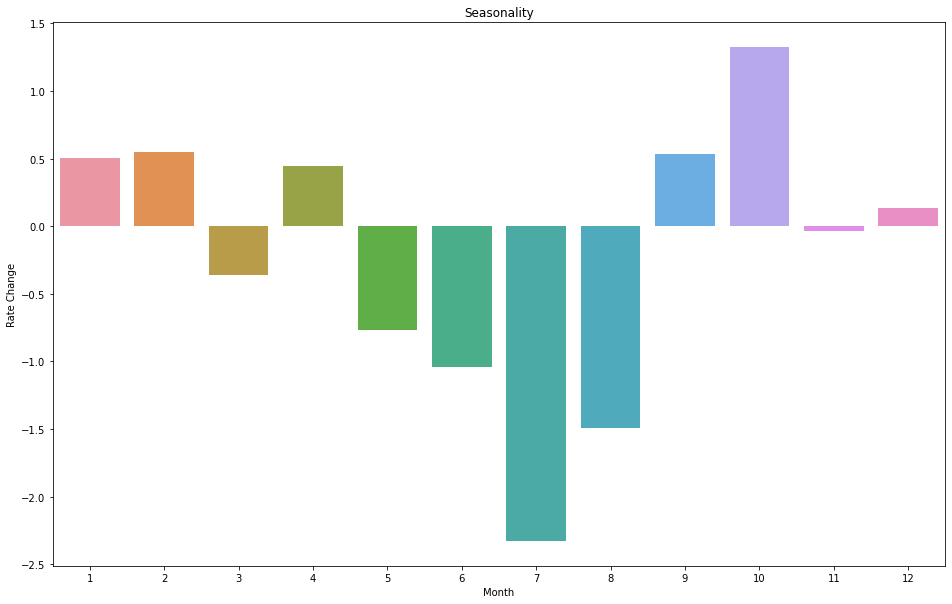

In [46]:
sns.barplot(x=per_ch.index.month, y=per_ch, ci=False)
plt.title('Seasonality')
plt.xlabel('Month')
plt.ylabel('Rate Change')

## Train Test Split

In [47]:
twenty = int(len(minus_rm) * 0.2)
train, test = minus_rm[:-twenty], minus_rm[-twenty:]

In [48]:
print(len(train))
print(len(test))

308
77


In [49]:
twenty

77

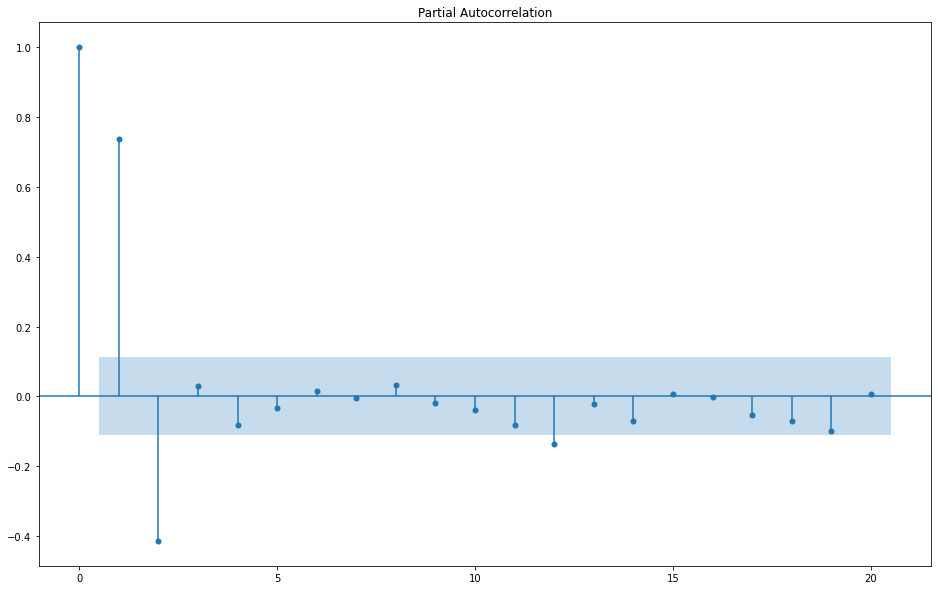

In [50]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_pacf(train, lags=20);

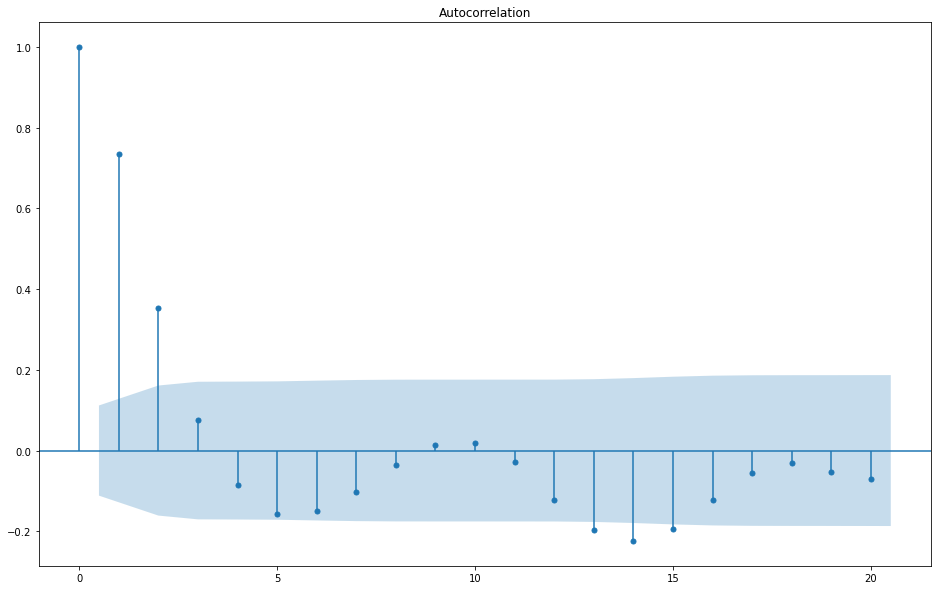

In [51]:
plot_acf(train, lags=20);

* Based on this, it looks like the p and q would be 3.

In [52]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm


In [53]:
'''
p = q = (0,1,2,3)


combo, value = (None, None)
for ar in p:
    for ma in q:
        try:
            model = ARMA(np.asarray(train), order=(ar, ma)).fit()
            print('Combo:', (ar, ma),'AIC:', model.aic)

            if value is None or model.aic < value:
                combo, value = ((ar, ma), model.aic)
                print(f'\tBest Parameters Updated')
        except ValueError:
            pass
            
print(f'\n{"*"*20}\nOptimal ARMA order: {combo}') '''


'\np = q = (0,1,2,3)\n\n\ncombo, value = (None, None)\nfor ar in p:\n    for ma in q:\n        try:\n            model = ARMA(np.asarray(train), order=(ar, ma)).fit()\n            print(\'Combo:\', (ar, ma),\'AIC:\', model.aic)\n\n            if value is None or model.aic < value:\n                combo, value = ((ar, ma), model.aic)\n                print(f\'\tBest Parameters Updated\')\n        except ValueError:\n            pass\n            \nprint(f\'\n{"*"*20}\nOptimal ARMA order: {combo}\') '

* These are all so close together.
* Best performance is for (3,2), but (2,2) is almost the same
* (1,1) has pretty good results considering the number of features

In [54]:
test

date
2015-01-01   -0.380929
2015-02-01   -0.159844
2015-03-01   -0.037061
2015-04-01   -0.066273
2015-05-01    0.207667
                ...   
2021-01-01    0.211815
2021-02-01    0.292617
2021-03-01    0.497667
2021-04-01    0.331990
2021-05-01    0.205654
Freq: MS, Name: yr_10, Length: 77, dtype: float64

In [55]:
def run_arma(trn, tst, p, q):

    model = ARMA(np.asarray(trn), order=(p,q)).fit()
    print(model.summary())

    pred = model.forecast(steps=77)[0]
    mse =  round(mean_squared_error(tst, pred), 3)

    print(f'Mean Sqared Error for Test: {mse}')

    return model, pred, mse



In [56]:
model_1, pred_1, mse_1 =run_arma(train, test, 2,2)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  308
Model:                     ARMA(2, 2)   Log Likelihood                  82.674
Method:                       css-mle   S.D. of innovations              0.184
Date:                Thu, 20 May 2021   AIC                           -153.348
Time:                        09:49:50   BIC                           -130.968
Sample:                             0   HQIC                          -144.399
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0407      0.003    -14.673      0.000      -0.046      -0.035
ar.L1.y        1.5587      0.053     29.444      0.000       1.455       1.662
ar.L2.y       -0.6156      0.053    -11.612      0.0

In [57]:
pred_ir = rm_monthly[-77:]+pred_1
pred_ir

date
2015-01-01    2.084298
2015-02-01    1.979730
2015-03-01    1.948092
2015-04-01    1.890713
2015-05-01    1.896858
                ...   
2021-01-01    0.822766
2021-02-01    0.921726
2021-03-01    1.072546
2021-04-01    1.262353
2021-05-01    1.379244
Freq: MS, Name: yr_10, Length: 77, dtype: float64

In [58]:
true_ir =ys_month[-77:]
true_ir

date
2015-01-01    1.892273
2015-02-01    1.977500
2015-03-01    2.042727
2015-04-01    1.935000
2015-05-01    2.198095
                ...   
2021-01-01    1.075238
2021-02-01    1.255000
2021-03-01    1.610870
2021-04-01    1.635000
2021-05-01    1.625556
Freq: MS, Name: yr_10, Length: 77, dtype: float64

In [59]:
mse_arma = round(mean_squared_error(true_ir, pred_ir), 3)

In [60]:
mse_arma

0.061

In [61]:
run_arma(train, test, 3,2)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  308
Model:                     ARMA(3, 2)   Log Likelihood                  83.689
Method:                       css-mle   S.D. of innovations              0.183
Date:                Thu, 20 May 2021   AIC                           -153.378
Time:                        09:49:50   BIC                           -127.268
Sample:                             0   HQIC                          -142.938
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0407      0.003    -13.461      0.000      -0.047      -0.035
ar.L1.y        1.7700      0.159     11.151      0.000       1.459       2.081
ar.L2.y       -1.0054      0.278     -3.619      0.0

(<statsmodels.tsa.arima_model.ARMAResultsWrapper at 0x242d57c6940>,
 array([-0.17172442, -0.14609499, -0.11747321, -0.09565522, -0.08091696,
        -0.07129838, -0.06492354, -0.06049523, -0.05722899, -0.05468217,
        -0.05261223, -0.05088503, -0.04942245, -0.04817477, -0.04710688,
        -0.04619171, -0.04540716, -0.04473459, -0.0441581 , -0.04366402,
        -0.04324062, -0.04287781, -0.04256693, -0.04230055, -0.04207231,
        -0.04187675, -0.04170918, -0.04156561, -0.04144259, -0.04133719,
        -0.04124688, -0.04116949, -0.04110319, -0.04104638, -0.0409977 ,
        -0.04095599, -0.04092026, -0.04088964, -0.0408634 , -0.04084092,
        -0.04082166, -0.04080516, -0.04079102, -0.0407789 , -0.04076852,
        -0.04075963, -0.04075201, -0.04074548, -0.04073988, -0.04073509,
        -0.04073098, -0.04072746, -0.04072444, -0.04072186, -0.04071964,
        -0.04071775, -0.04071612, -0.04071473, -0.04071354, -0.04071251,
        -0.04071164, -0.04071089, -0.04071024, -0.040709

In [62]:
run_arma(train, test, 1, 1)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  308
Model:                     ARMA(1, 1)   Log Likelihood                  73.745
Method:                       css-mle   S.D. of innovations              0.190
Date:                Thu, 20 May 2021   AIC                           -139.490
Time:                        09:49:50   BIC                           -124.570
Sample:                             0   HQIC                          -133.524
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0474      0.036     -1.307      0.191      -0.118       0.024
ar.L1.y        0.5665      0.055     10.254      0.000       0.458       0.675
ma.L1.y        0.4587      0.055      8.363      0.0

(<statsmodels.tsa.arima_model.ARMAResultsWrapper at 0x242d5825fa0>,
 array([-0.17209605, -0.11804055, -0.08741816, -0.07007061, -0.06024324,
        -0.05467604, -0.05152223, -0.0497356 , -0.04872348, -0.04815011,
        -0.0478253 , -0.04764129, -0.04753705, -0.047478  , -0.04744455,
        -0.0474256 , -0.04741486, -0.04740878, -0.04740533, -0.04740338,
        -0.04740228, -0.04740165, -0.0474013 , -0.04740109, -0.04740098,
        -0.04740092, -0.04740088, -0.04740086, -0.04740085, -0.04740084,
        -0.04740084, -0.04740083, -0.04740083, -0.04740083, -0.04740083,
        -0.04740083, -0.04740083, -0.04740083, -0.04740083, -0.04740083,
        -0.04740083, -0.04740083, -0.04740083, -0.04740083, -0.04740083,
        -0.04740083, -0.04740083, -0.04740083, -0.04740083, -0.04740083,
        -0.04740083, -0.04740083, -0.04740083, -0.04740083, -0.04740083,
        -0.04740083, -0.04740083, -0.04740083, -0.04740083, -0.04740083,
        -0.04740083, -0.04740083, -0.04740083, -0.047400

date
1989-05-01   -0.365550
1989-06-01   -0.759096
1989-07-01   -0.745286
1989-08-01   -0.336338
1989-09-01   -0.039926
                ...   
2021-01-01    0.211815
2021-02-01    0.292617
2021-03-01    0.497667
2021-04-01    0.331990
2021-05-01    0.205654
Freq: MS, Name: yr_10, Length: 385, dtype: float64

In [63]:
pl_tst = pd.DataFrame(test)

In [64]:
pl_tst['pred'] = pred_1

In [65]:
pl_tst

yr_10      pred
date                          
2015-01-01 -0.380929 -0.188904
2015-02-01 -0.159844 -0.157614
2015-03-01 -0.037061 -0.131696
2015-04-01 -0.066273 -0.110560
2015-05-01  0.207667 -0.093570
...              ...       ...
2021-01-01  0.211815 -0.040657
2021-02-01  0.292617 -0.040657
2021-03-01  0.497667 -0.040657
2021-04-01  0.331990 -0.040657
2021-05-01  0.205654 -0.040657

[77 rows x 2 columns]

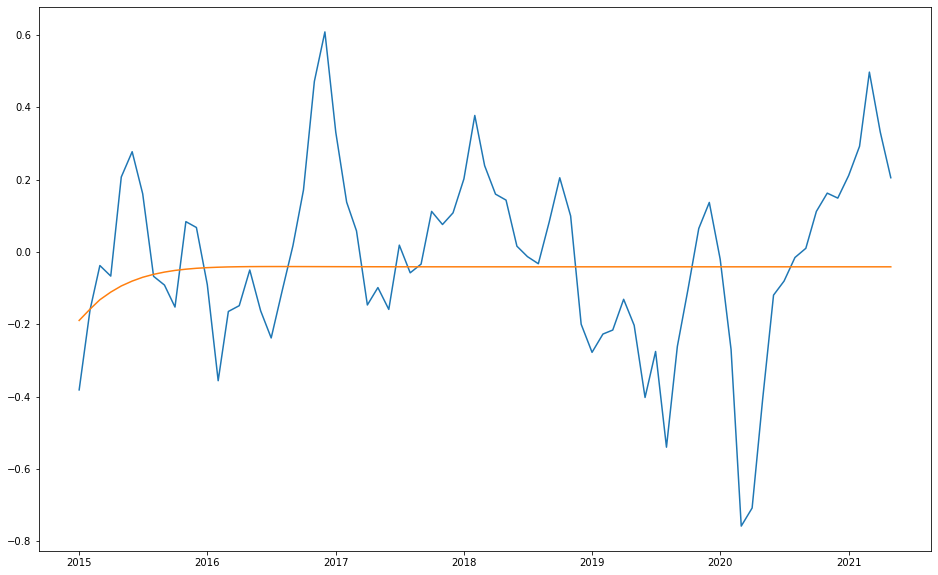

In [66]:
plt.plot(pl_tst)

In [67]:
from statsmodels.tsa.arima_model import ARIMA

### Non stationary train test split

In [68]:
twenty = int(len(ys_month) * 0.2)
train, test = ys_month[:-twenty], ys_month[-twenty:]

In [69]:
'''p = d = q = (0,1,2,3)


combo, value = (None, None)
for ar in p:
    for ma in q:
        for diff in d:
            try:
                model = ARIMA(train, order=(ar, diff, ma)).fit()
                print('Combo:', (ar, diff, ma),'AIC:', model.aic)

                if value is None or model.aic < value:
                    combo, value = ((ar, diff, ma), model.aic)
                    print(f'\tBest Parameters Updated')
            except ValueError:
                pass
            
print(f'\n{"*"*20}\nOptimal ARIMA order: {combo}')'''

'p = d = q = (0,1,2,3)\n\n\ncombo, value = (None, None)\nfor ar in p:\n    for ma in q:\n        for diff in d:\n            try:\n                model = ARIMA(train, order=(ar, diff, ma)).fit()\n                print(\'Combo:\', (ar, diff, ma),\'AIC:\', model.aic)\n\n                if value is None or model.aic < value:\n                    combo, value = ((ar, diff, ma), model.aic)\n                    print(f\'\tBest Parameters Updated\')\n            except ValueError:\n                pass\n            \nprint(f\'\n{"*"*20}\nOptimal ARIMA order: {combo}\')'

* Best combo is (1,1,2): -74.98
* (0,1,1): -65.84
* (3,1,3): -72.6

In [70]:
arima_model = ARIMA(train, order=(1,1,2)).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.yr_10   No. Observations:                  311
Model:                 ARIMA(1, 1, 2)   Log Likelihood                  42.491
Method:                       css-mle   S.D. of innovations              0.210
Date:                Thu, 20 May 2021   AIC                            -74.983
Time:                        09:49:51   BIC                            -56.284
Sample:                    02-01-1989   HQIC                           -67.509
                         - 12-01-2014                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0202      0.002    -12.354      0.000      -0.023      -0.017
ar.L1.D.yr_10     0.8975      0.027     32.654      0.000       0.844       0.951
ma.L1.D.yr_10    -0.6240      0.056    -11.232      0.000      -0.733      -0.515
ma.L2.D.yr_10    -0.3760      0.055     -6.844      0.000      -0.484      -0.268
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1142           +0.0000j            1.1142            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -2.6596           +0.0000j            2.6596            0.5000
-----------------------------------------------------------------------------
"""

In [71]:
def get_MSE(model, trn, tst):
    pred = model.forecast(steps=len(tst))[0]
    mse_tst =  round(mean_squared_error(tst, pred), 3)

    print(mse_tst)

In [72]:
get_MSE(arima_model, train, test)

1.024


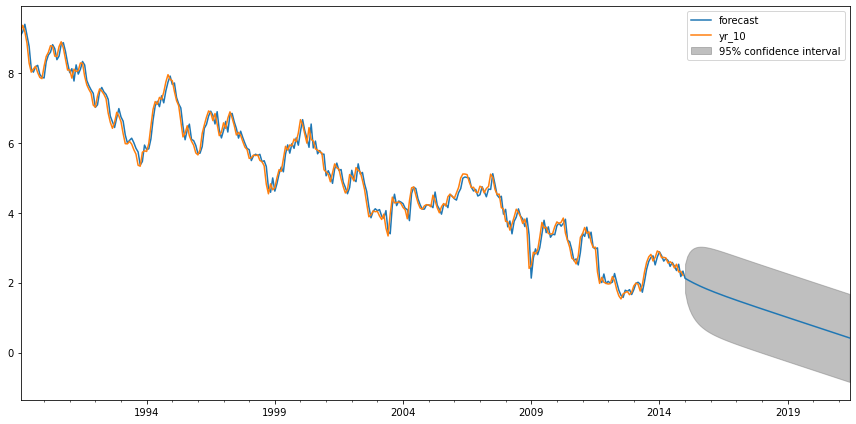

In [73]:
fig, ax = plt.subplots(figsize=(12, 6))
arima_model.plot_predict(1, len(train)+77, ax=ax)
fig.tight_layout()

In [74]:
arima_model = ARIMA(train, order=(0,1,1)).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.yr_10   No. Observations:                  311
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  35.919
Method:                       css-mle   S.D. of innovations              0.216
Date:                Thu, 20 May 2021   AIC                            -65.838
Time:                        09:49:52   BIC                            -54.619
Sample:                    02-01-1989   HQIC                           -61.354
                         - 12-01-2014                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0223      0.016     -1.359      0.174      -0.054       0.010
ma.L1.D.yr_10     0.3414      0.055      6.158      0.000       0.233       0.450
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.9293           +0.0000j            2.9293            0.5000
-----------------------------------------------------------------------------
"""

In [75]:
get_MSE(arima_model, train, test)

0.912


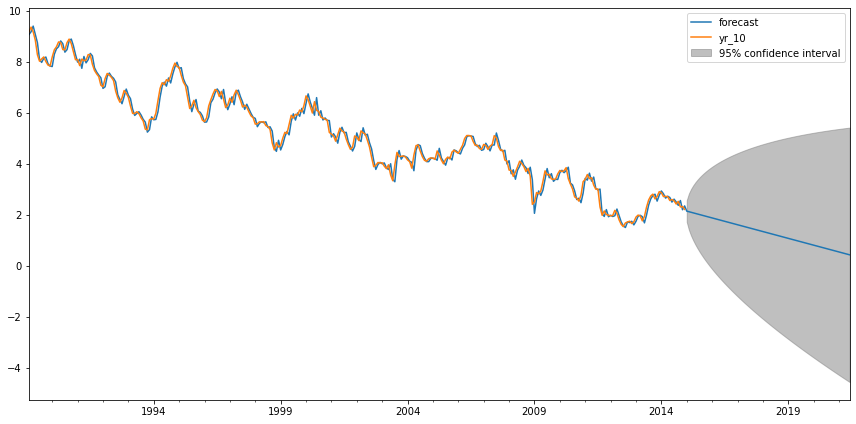

In [76]:
fig, ax = plt.subplots(figsize=(12, 6))
arima_model.plot_predict(1, len(train)+77, ax=ax)
fig.tight_layout()

In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [78]:
'''# Setting up parameter combinations.
p = q = (0, 1,2)
d = 0

pdq = [(ar, d, ma) for ar in p for ma in q]
pdqs = [(c[0], d, c[2], 12) for c in pdq]

# Iterate and try models.
combo, value = (None, None)
for pdq_combo in pdq:
    for pdqs_combo in pdqs:
        try:
            model = SARIMAX(
               np.asarray(train), 
               order=pdq_combo,
               seasonal_order=pdqs_combo,
               enforce_stationarity=False,
               enforce_invertibility=False
               )
            output = model.fit()

            if value is None or output.aic < value:
                combo, value = ((pdq_combo, pdqs_combo), output.aic)
                print('SARIMA Combos:', (pdq_combo, pdqs_combo),'AIC:', output.aic)
        except ValueError:
            pass      
            
print(f'\n{"*"*20}\nOptimal SARIMA order: {combo}')'''

'# Setting up parameter combinations.\np = q = (0, 1,2)\nd = 0\n\npdq = [(ar, d, ma) for ar in p for ma in q]\npdqs = [(c[0], d, c[2], 12) for c in pdq]\n\n# Iterate and try models.\ncombo, value = (None, None)\nfor pdq_combo in pdq:\n    for pdqs_combo in pdqs:\n        try:\n            model = SARIMAX(\n               np.asarray(train), \n               order=pdq_combo,\n               seasonal_order=pdqs_combo,\n               enforce_stationarity=False,\n               enforce_invertibility=False\n               )\n            output = model.fit()\n\n            if value is None or output.aic < value:\n                combo, value = ((pdq_combo, pdqs_combo), output.aic)\n                print(\'SARIMA Combos:\', (pdq_combo, pdqs_combo),\'AIC:\', output.aic)\n        except ValueError:\n            pass      \n            \nprint(f\'\n{"*"*20}\nOptimal SARIMA order: {combo}\')'

* Best is ((1, 0, 1), (0, 0, 0, 12))


In [79]:
 sari_model = SARIMAX(
    train, 
    order=(1, 0, 1),
    seasonal_order=(0, 0, 0, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
    ).fit()

print(sari_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  yr_10   No. Observations:                  312
Model:               SARIMAX(1, 0, 1)   Log Likelihood                  36.154
Date:                Thu, 20 May 2021   AIC                            -66.308
Time:                        09:49:53   BIC                            -55.099
Sample:                    01-01-1989   HQIC                           -61.827
                         - 12-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9943      0.003    323.234      0.000       0.988       1.000
ma.L1          0.3408      0.048      7.109      0.000       0.247       0.435
sigma2         0.0463      0.003     15.231      0.0

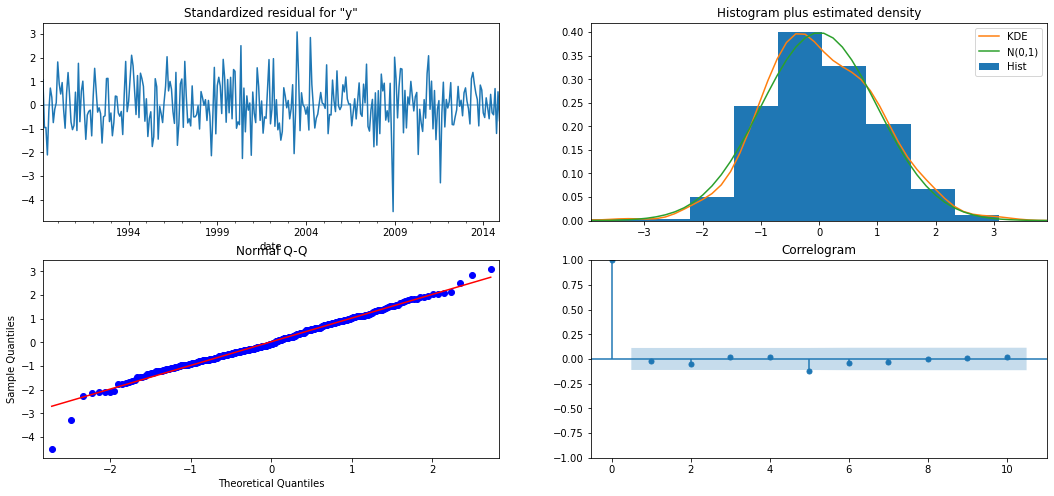

In [80]:
sari_model.plot_diagnostics(figsize=(18, 8))
plt.show()

In [81]:
sari_pred = sari_model.forecast(steps=len(test))
sari_mse = round(mean_squared_error(test, sari_pred), 3)

In [82]:
sari_mse

0.439

In [83]:
sari_pred

2015-01-01    2.149027
2015-02-01    2.136780
2015-03-01    2.124602
2015-04-01    2.112494
2015-05-01    2.100454
                ...   
2021-01-01    1.424051
2021-02-01    1.415936
2021-03-01    1.407866
2021-04-01    1.399842
2021-05-01    1.391865
Freq: MS, Name: predicted_mean, Length: 77, dtype: float64

In [84]:
mean_squared_error(test, sari_pred)

0.4392816464907209

In [85]:
sari_model.get_prediction(start=pd.to_datetime('2015-01-01'), 
                        end=pd.to_datetime('2021-05-01'), 
                        dynamic=False )

In [86]:
tst = pd.DataFrame(test)

In [87]:
tst.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2015-01-01 to 2021-05-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yr_10   77 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


In [88]:
sari_model

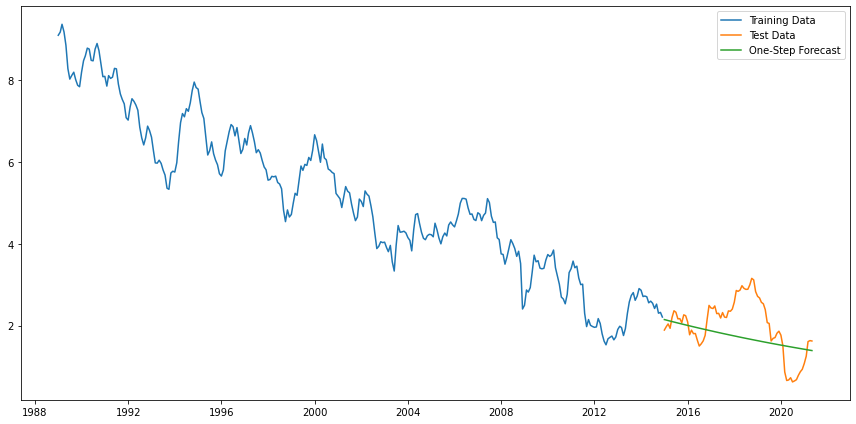

In [89]:
pred = sari_model.get_prediction(
    start=pd.to_datetime('2015-01-01'),
    end=pd.to_datetime('2021-5-01'),
    dynamic=True)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train, label='Training Data')
ax.plot(test, label='Test Data')
ax.plot(pred.predicted_mean, label='One-Step Forecast')
ax.legend()
fig.tight_layout()

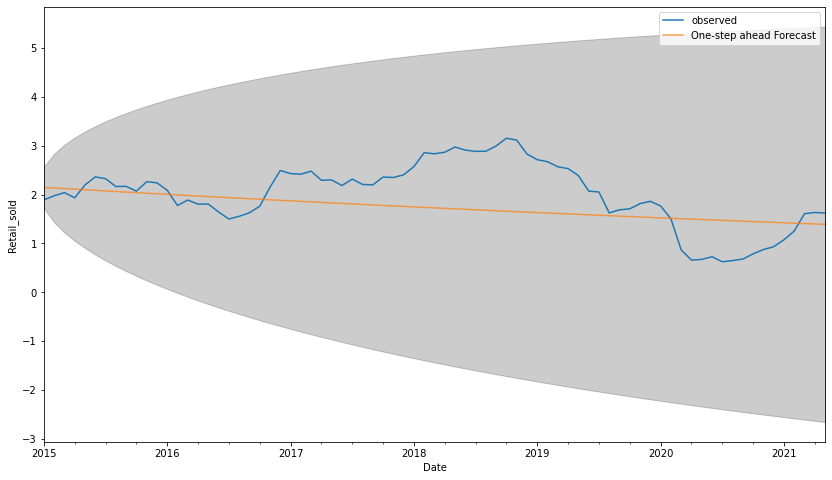

In [90]:
pred = sari_model.get_prediction(
    start=pd.to_datetime('2015-01-01'),
    end=pd.to_datetime('2021-5-01'),
    dynamic=False)

pred_ci = pred.conf_int()
ax = test.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',
alpha=.7, figsize=(14, 8))
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()


In [91]:
preds = sari_model.get_forecast( steps=77,
    dynamic=False)

In [92]:
tst_prd =pd.DataFrame(test)
tst_prd['pred_1'] = preds.predicted_mean
tst_prd

yr_10    pred_1
date                          
2015-01-01  1.892273  2.149027
2015-02-01  1.977500  2.136780
2015-03-01  2.042727  2.124602
2015-04-01  1.935000  2.112494
2015-05-01  2.198095  2.100454
...              ...       ...
2021-01-01  1.075238  1.424051
2021-02-01  1.255000  1.415936
2021-03-01  1.610870  1.407866
2021-04-01  1.635000  1.399842
2021-05-01  1.625556  1.391865

[77 rows x 2 columns]

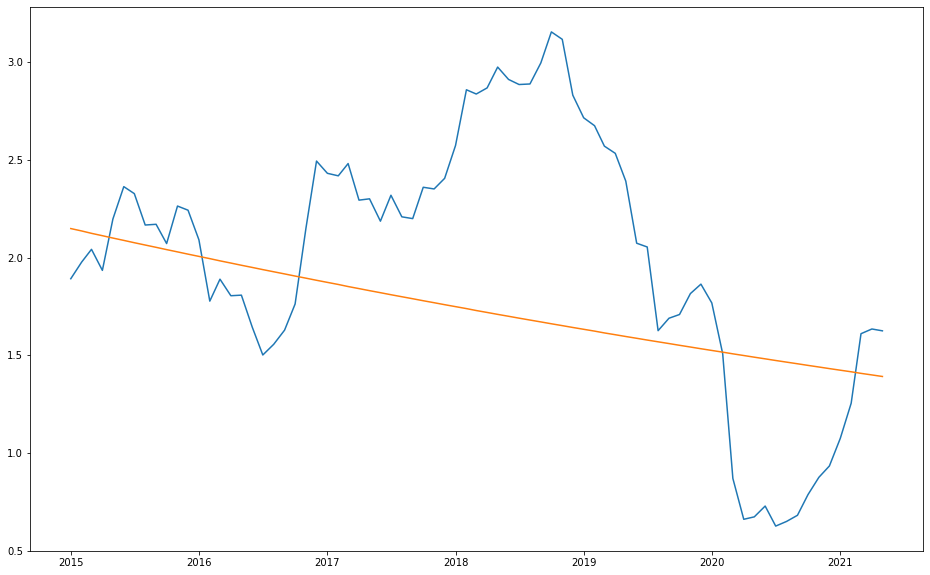

In [93]:
plt.plot(tst_prd)

In [94]:
len(preds.predicted_mean)

77

In [95]:
 sari_model = SARIMAX(
    np.asarray(train), 
    order=(1, 1, 2),
    seasonal_order=(0, 1, 2, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
    ).fit()

print(sari_model.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  312
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                  21.229
Date:                            Thu, 20 May 2021   AIC                            -30.459
Time:                                    09:50:03   BIC                             -8.824
Sample:                                         0   HQIC                           -21.773
                                            - 312                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9035      0.036     25.013      0.000       0.833       0.974
ma.L1         -0.6636     58.875   

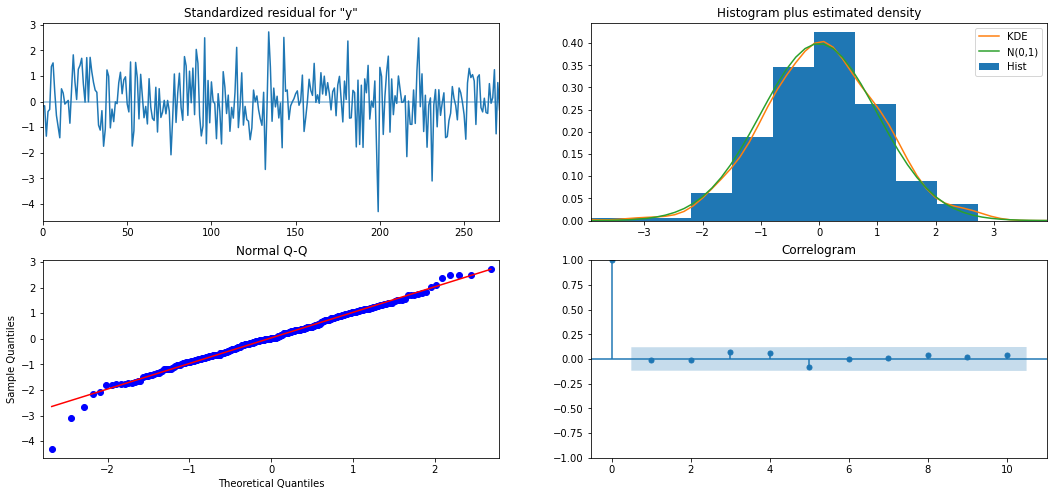

In [96]:
sari_model.plot_diagnostics(figsize=(18, 8))
plt.show()

In [97]:
sari_pred = sari_model.forecast(steps=len(test))
sari_mse = round(mean_squared_error(test, sari_pred), 3)
sari_mse

0.748

In [98]:
preds = sari_model.get_forecast( steps=77,
    dynamic=False)

In [99]:
tst_prd

yr_10    pred_1
date                          
2015-01-01  1.892273  2.149027
2015-02-01  1.977500  2.136780
2015-03-01  2.042727  2.124602
2015-04-01  1.935000  2.112494
2015-05-01  2.198095  2.100454
...              ...       ...
2021-01-01  1.075238  1.424051
2021-02-01  1.255000  1.415936
2021-03-01  1.610870  1.407866
2021-04-01  1.635000  1.399842
2021-05-01  1.625556  1.391865

[77 rows x 2 columns]

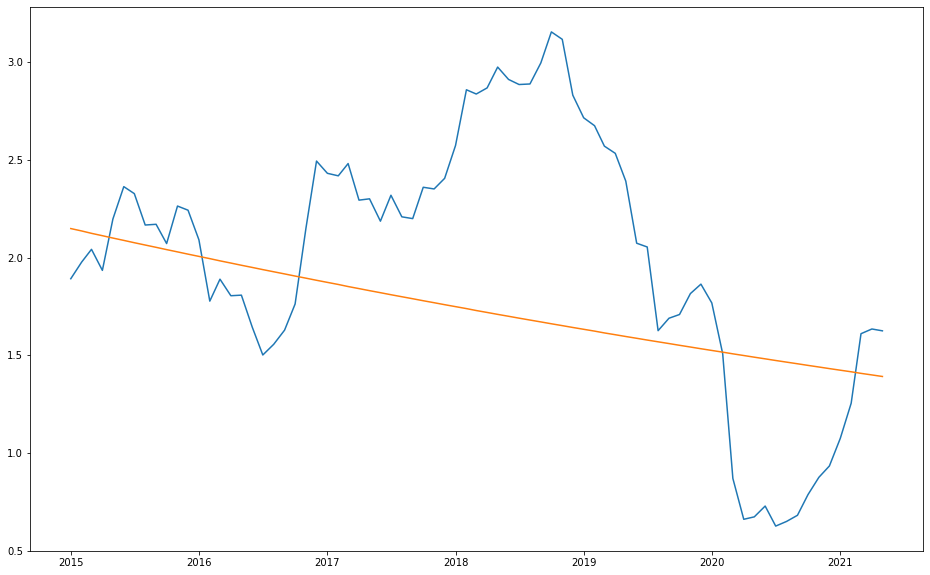

In [100]:
plt.plot(tst_prd)

In [101]:
minus_rm

date
1989-05-01   -0.365550
1989-06-01   -0.759096
1989-07-01   -0.745286
1989-08-01   -0.336338
1989-09-01   -0.039926
                ...   
2021-01-01    0.211815
2021-02-01    0.292617
2021-03-01    0.497667
2021-04-01    0.331990
2021-05-01    0.205654
Freq: MS, Name: yr_10, Length: 385, dtype: float64

# RNN

In [102]:
ml_data = ys_month
p_60 = int(len(ml_data) * 0.6)
p_80 = int(len(ml_data) * 0.8)

train = ml_data[:p_60]
val = ml_data[p_60:p_80]
test = ml_data[p_80:]

In [103]:
X_train, y_train = (train), (train.shift(-1, freq='MS'))
X_val, y_val =(val), (val.shift(-1, freq='MS'))
X_test, y_test =(test), (test.shift(-1, freq='MS'))

In [104]:
X_train, y_train = np.array(X_train[:-1]), np.array(y_train[1:])
X_val, y_val =  np.array(X_val[:-1]), np.array(y_val[1:])
X_test, y_test = np.array(X_test[:-1]), np.array(y_test[1:])

In [105]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 1))
X_val = np.reshape(X_val, (X_val.shape[0], 1, 1))
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(232, 1, 1)
(77, 1, 1)
(77, 1, 1)


In [106]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras import optimizers
import tensorflow as tf


tf.random.set_seed(389)

In [107]:
batch_size = 1
look_back = 1


model = Sequential()
model.add(LSTM(6, batch_input_shape=(batch_size, look_back, 1),
                return_sequences=True, stateful=True))
model.add(LSTM(6, return_sequences=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
es =EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), callbacks=es,
                    epochs=100, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/100
232/232 - 1s - loss: 29.9952 - val_loss: 1.4718
Epoch 2/100
232/232 - 0s - loss: 11.4563 - val_loss: 1.4387
Epoch 3/100
232/232 - 0s - loss: 4.8041 - val_loss: 4.1566
Epoch 4/100
232/232 - 0s - loss: 2.9162 - val_loss: 6.5953
Epoch 5/100
232/232 - 0s - loss: 2.3054 - val_loss: 8.2264
Epoch 6/100
232/232 - 0s - loss: 2.1277 - val_loss: 9.1925
Epoch 7/100
232/232 - 0s - loss: 2.0783 - val_loss: 9.6745
Epoch 8/100
232/232 - 0s - loss: 2.0632 - val_loss: 9.6031
Epoch 9/100
232/232 - 0s - loss: 2.0057 - val_loss: 8.8539
Epoch 10/100
232/232 - 0s - loss: 1.9221 - val_loss: 8.0343
Epoch 11/100
232/232 - 0s - loss: 1.7728 - val_loss: 4.4906
Epoch 12/100
232/232 - 0s - loss: 1.2555 - val_loss: 2.1484
Epoch 13/100
232/232 - 0s - loss: 0.8243 - val_loss: 1.1753
Epoch 14/100
232/232 - 0s - loss: 0.5535 - val_loss: 0.7371
Epoch 15/100
232/232 - 0s - loss: 0.3925 - val_loss: 0.7444
Epoch 16/100
232/232 - 0s - loss: 0.3014 - val_loss: 0.7891
Epoch 17/100
232/232 - 0s - loss: 0.2401 - val_

Train: 0.812, Val: 1.371


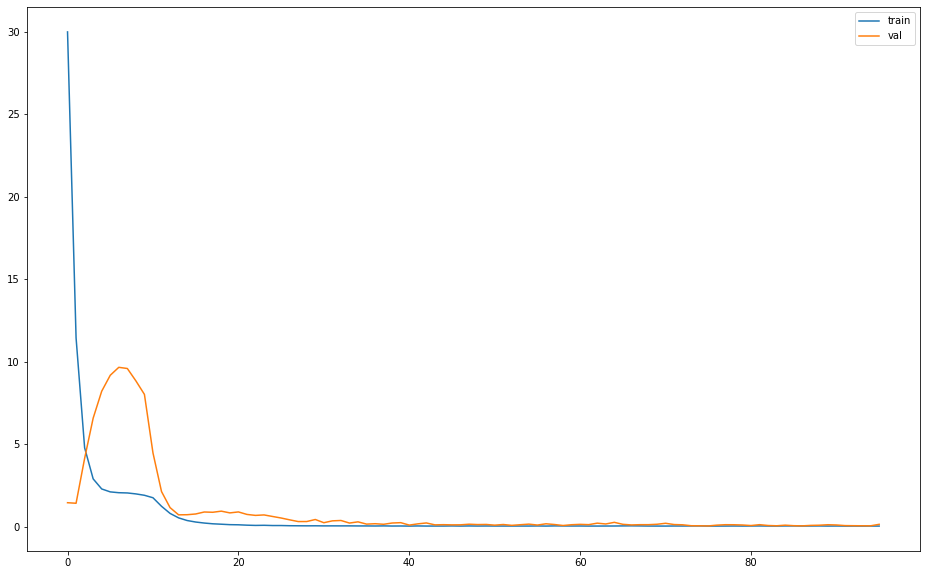

In [108]:
train_acc = model.evaluate(X_train, y_train, verbose=0)
val_acc = model.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, Val: %.3f' % (train_acc, val_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [109]:
testPredict = model.predict(X_val, batch_size=batch_size)
trainPredict = model.predict(X_train, batch_size=batch_size)

In [110]:
y_hat =testPredict.reshape(-1)

In [111]:
res =pd.DataFrame(y_val)

In [112]:
res.loc[:,1] = y_hat

In [113]:
round(mean_squared_error(y_test, y_hat), 3)

1.906

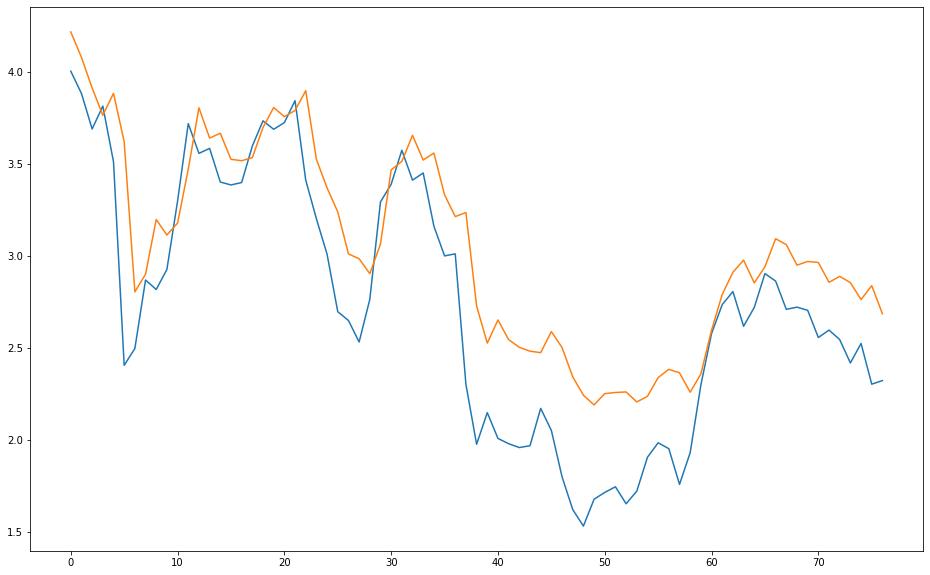

In [114]:
plt.plot(res)

In [115]:
X_tv =np.concatenate((X_train, X_val), axis=None)
y_tv =np.concatenate((y_train, y_val), axis=None)

In [116]:
len(X_tv)

309

In [117]:
len(y_tv)

309

In [118]:
X_tv = np.reshape(X_tv, (X_tv.shape[0], 1, 1))

In [119]:
es =EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

batch_size = 1
look_back = 1


model2 = Sequential()
model2.add(LSTM(6, batch_input_shape=(batch_size, look_back, 1),
                return_sequences=True, stateful=True))
model2.add(LSTM(6, return_sequences=True))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
history2 = model2.fit(X_tv, y_tv, 
                    validation_data=(X_test, y_test), callbacks=es,
                    epochs=100, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/100
309/309 - 2s - loss: 19.9054 - val_loss: 1.0766
Epoch 2/100
309/309 - 1s - loss: 5.2578 - val_loss: 5.5151
Epoch 3/100
309/309 - 0s - loss: 3.6972 - val_loss: 7.2380
Epoch 4/100
309/309 - 1s - loss: 3.1565 - val_loss: 4.1725
Epoch 5/100
309/309 - 1s - loss: 2.2327 - val_loss: 0.3855
Epoch 6/100
309/309 - 1s - loss: 1.2698 - val_loss: 0.2088
Epoch 7/100
309/309 - 1s - loss: 0.8111 - val_loss: 0.2268
Epoch 8/100
309/309 - 1s - loss: 0.5743 - val_loss: 0.1938
Epoch 9/100
309/309 - 1s - loss: 0.4460 - val_loss: 0.1373
Epoch 10/100
309/309 - 1s - loss: 0.3691 - val_loss: 0.2041
Epoch 11/100
309/309 - 1s - loss: 0.3035 - val_loss: 0.1119
Epoch 12/100
309/309 - 1s - loss: 0.2616 - val_loss: 0.0751
Epoch 13/100
309/309 - 1s - loss: 0.2245 - val_loss: 0.0820
Epoch 14/100
309/309 - 1s - loss: 0.2087 - val_loss: 0.0692
Epoch 15/100
309/309 - 1s - loss: 0.1894 - val_loss: 0.0808
Epoch 16/100
309/309 - 1s - loss: 0.1634 - val_loss: 0.0691
Epoch 17/100
309/309 - 1s - loss: 0.1655 - val_l

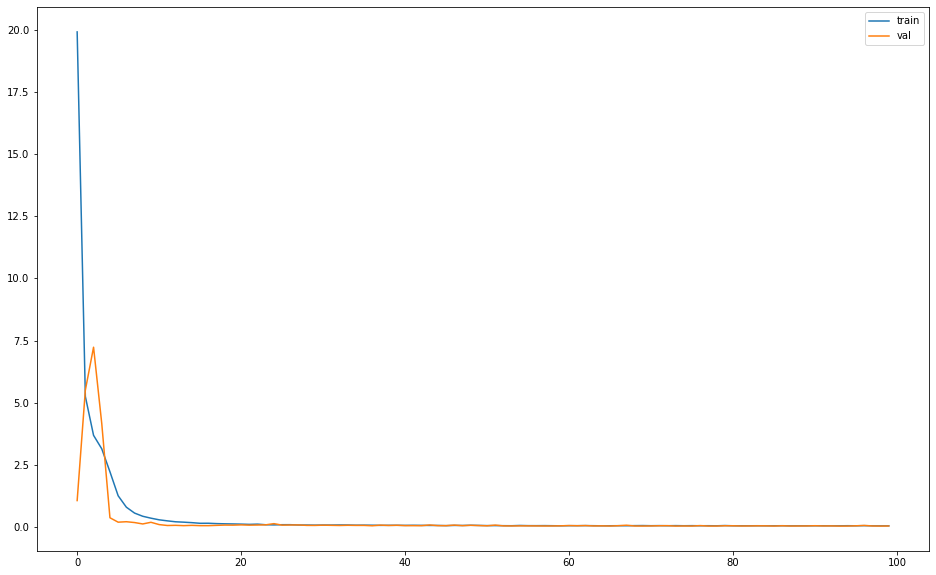

In [120]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='val')
plt.legend()
plt.show()

In [121]:
train_acc = model2.evaluate(X_tv, y_tv, verbose=0)
test_acc = model2.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.641, Test: 0.242


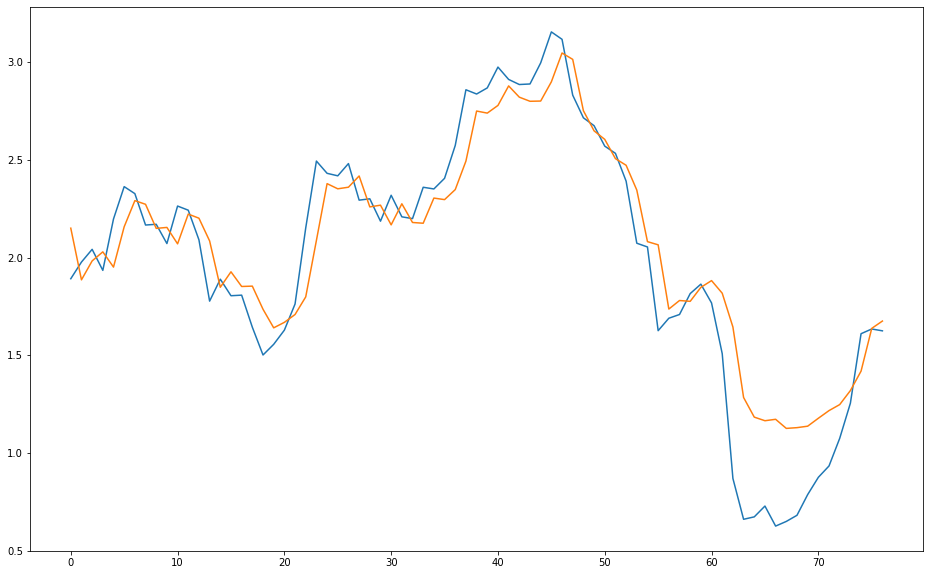

In [122]:
testPredict = model2.predict(X_test, batch_size=batch_size)
y_hat =testPredict.reshape(-1)
res =pd.DataFrame(y_test)
res.loc[:,1] = y_hat
plt.plot(res)

In [123]:
mean_absolute_error(y_test, y_hat)

0.1709200289218535

In [124]:
x_input = np.array([X_test[-1]])
temp_input=list(x_input)
lst_output=[]
months = 24

for month in range(0, months ,1):
    
    if(len(temp_input)>1):
        x_input=np.array(temp_input[1:])
        #print(x_input)
        x_input = x_input.reshape((1, 1, 1))
        #print(x_input)
        yhat = model2.predict(x_input, verbose=0)
        val = yhat.reshape(-1)
        temp_input.append(val)
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(val)
        
    else:
        x_input = x_input.reshape((1,  1, 1))
        yhat = model2.predict(x_input, verbose=0)
        val = yhat.reshape(-1)
        temp_input.append(val)
        lst_output.append(val)
        
    

forecasts =np.array(lst_output).reshape(-1)

In [125]:
len(forecasts)

24

In [126]:
forecasts

array([1.6969621, 1.7484263, 1.789754 , 1.8244288, 1.8537831, 1.8786831,
       1.8998145, 1.917748 , 1.9329655, 1.9458766, 1.9568281, 1.9661174,
       1.9739935, 1.9806695, 1.9863254, 1.9911152, 1.9951681, 1.998596 ,
       2.0014915, 2.0039353, 2.0059948, 2.0077286, 2.0091853, 2.0104074],
      dtype=float32)

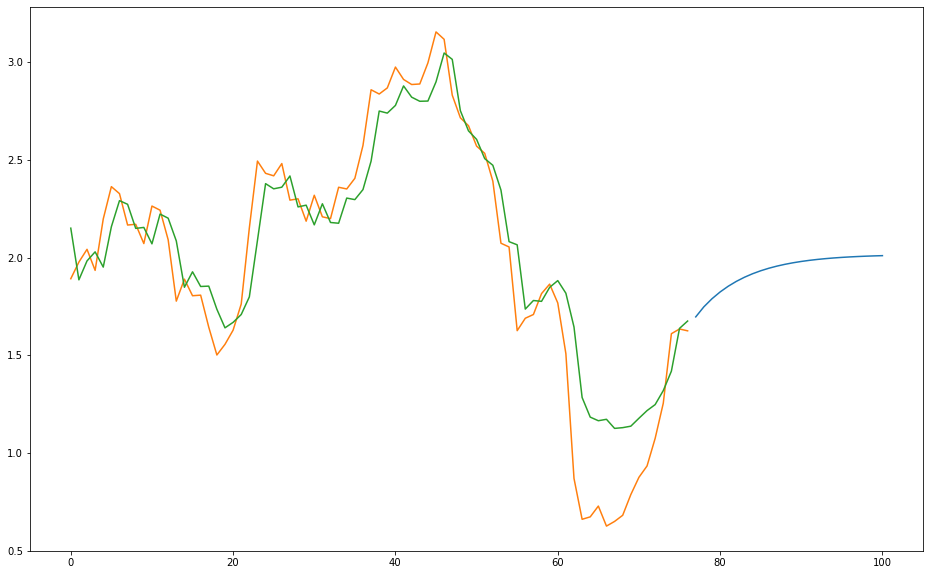

In [127]:
plt.plot(np.arange(77,77+months), forecasts)
plt.plot(res)

In [128]:
forecasts =pd.Series(forecasts)

In [129]:
saif =pd.concat([res.loc[:,1], forecasts], ignore_index=True)

In [155]:
X_test.reshape(-1)

array([2.21      , 1.89227273, 1.9775    , 2.04272727, 1.935     ,
       2.19809524, 2.36363636, 2.32782609, 2.16714286, 2.17090909,
       2.07227273, 2.26428571, 2.24304348, 2.09142857, 1.77761905,
       1.89      , 1.8052381 , 1.80818182, 1.64409091, 1.50190476,
       1.55652174, 1.62909091, 1.76285714, 2.15227273, 2.49454545,
       2.43181818, 2.419     , 2.48173913, 2.2945    , 2.30130435,
       2.18681818, 2.31952381, 2.20913043, 2.2       , 2.36045455,
       2.35181818, 2.40619048, 2.57434783, 2.8595    , 2.83772727,
       2.86904762, 2.97565217, 2.91238095, 2.88636364, 2.88913043,
       2.997     , 3.15565217, 3.11772727, 2.83190476, 2.71608696,
       2.6755    , 2.57095238, 2.53409091, 2.39173913, 2.074     ,
       2.05478261, 1.62636364, 1.69      , 1.70913043, 1.81619048,
       1.86454545, 1.76826087, 1.5085    , 0.87      , 0.66090909,
       0.67333333, 0.72863636, 0.62608696, 0.65      , 0.68136364,
       0.78727273, 0.87571429, 0.93391304, 1.0752381 , 1.255  

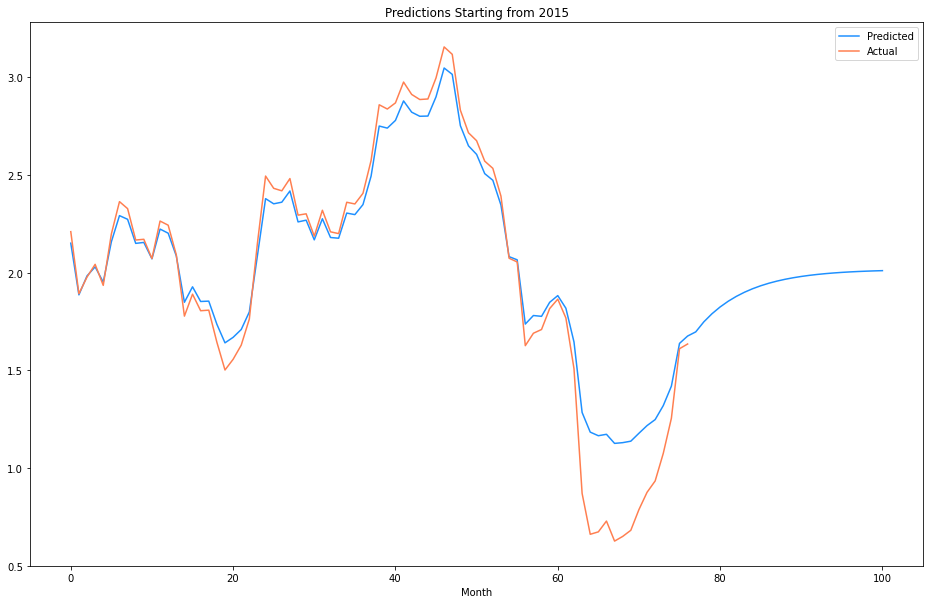

In [158]:
plt.plot(saif, label='Predicted', color='dodgerblue')
plt.plot(X_test.reshape(-1), label= 'Actual', color='coral')
plt.xlabel('Month')
plt.title('Predictions Starting from 2015')
plt.legend()

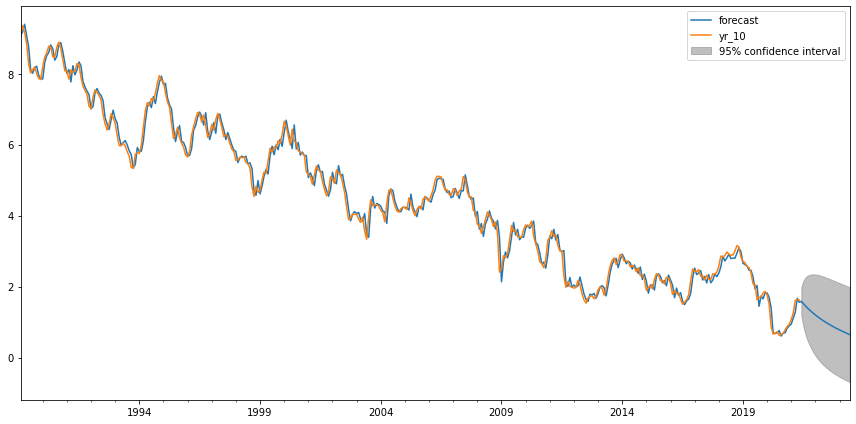

In [131]:
arima_model = ARIMA(ys_month, order=(1,1,2)).fit()
fig, ax = plt.subplots(figsize=(12, 6))
arima_model.plot_predict(1, len(ys_month)+24, ax=ax)
fig.tight_layout()
#plt.xlim([550, 630])
#plt.ylim([.5, 3.25])